In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [229]:
import pandas as pd
df = pd.read_csv("depression_data.csv")

In [230]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

# Pre-Processing
- Mapping values in chosen columns to integers (to easily understand confusion matrix)

In [231]:
bins = [0, 12, 19, 35, 60, 100] 
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [232]:
df.drop(columns='Age',inplace = True)
df.drop(columns='Name',inplace = True)
changes = {'Divorced':0, 'Widowed':1, 'Single':2, 'Married':3}
df['Marital Status'] = df['Marital Status'].map(changes)

In [233]:
changes2 = {"Bachelor's Degree":4, "High School":3, "Associate Degree":2, "Master's Degree":1, "PhD":0}
df['Education Level'] = df['Education Level'].map(changes2)

In [234]:
df['Smoking Status'].value_counts()

Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

In [235]:
changes3 = {'Non-smoker':2, 'Former':1, 'Current':0}
df['Smoking Status'] = df['Smoking Status'].map(changes3)
df['Smoking Status'].value_counts()

Smoking Status
2    247416
1    116184
0     50168
Name: count, dtype: int64

In [236]:
df['Physical Activity Level'].value_counts()

Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64

In [237]:
changes4 = {'Sedentary':2, 'Moderate':1, 'Active':0}
df['Physical Activity Level'] = df['Physical Activity Level'].map(changes4)
df['Physical Activity Level'].value_counts()

Physical Activity Level
2    176850
1    158013
0     78905
Name: count, dtype: int64

In [238]:
df['Employment Status'].value_counts()

Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64

In [239]:
changes5 = {'Employed':1, 'Unemployed':0}

df['Employment Status'] = df['Employment Status'].map(changes5)
df['Employment Status'].value_counts()

Employment Status
1    265659
0    148109
Name: count, dtype: int64

In [240]:
df['Alcohol Consumption'].value_counts()

Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int64

In [241]:
changes6 = {'Moderate':2, 'Low':1, 'High':0}

df['Alcohol Consumption'] = df['Alcohol Consumption'].map(changes6)
df['Alcohol Consumption'].value_counts()

Alcohol Consumption
2    173440
1    139250
0    101078
Name: count, dtype: int64

In [242]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    170817
Moderate     170446
Healthy       72505
Name: count, dtype: int64

In [243]:
changes7 = {'Unhealthy':2, 'Moderate':1, 'Healthy':0}
df['Dietary Habits'] = df['Dietary Habits'].map(changes7)
df['Dietary Habits'].value_counts()

Dietary Habits
2    170817
1    170446
0     72505
Name: count, dtype: int64

In [244]:
df['Sleep Patterns'].value_counts()


Sleep Patterns
Fair    196789
Poor    129582
Good     87397
Name: count, dtype: int64

In [245]:
changes8 = {'Fair':2, 'Poor':1, 'Good':0}

df['Sleep Patterns'] = df['Sleep Patterns'].map(changes8)
df['Sleep Patterns'].value_counts()

Sleep Patterns
2    196789
1    129582
0     87397
Name: count, dtype: int64

In [246]:
df['History of Mental Illness'].value_counts()

History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

In [247]:
changes9 = {'No':1, 'Yes':0}

df['History of Mental Illness'] = df['History of Mental Illness'].map(changes9)
df['History of Mental Illness'].value_counts()

History of Mental Illness
1    287943
0    125825
Name: count, dtype: int64

In [248]:
df['History of Substance Abuse'].value_counts()

History of Substance Abuse
No     284880
Yes    128888
Name: count, dtype: int64

In [249]:
changes10 = {'No':1, 'Yes':0}

df['History of Substance Abuse'] = df['History of Substance Abuse'].map(changes10)
df['History of Substance Abuse'].value_counts()

History of Substance Abuse
1    284880
0    128888
Name: count, dtype: int64

In [250]:
df['Family History of Depression'].value_counts()

Family History of Depression
No     302515
Yes    111253
Name: count, dtype: int64

In [251]:
changes11 = {'No':1, 'Yes':0}
df['Family History of Depression'] = df['Family History of Depression'].map(changes11)
df['Family History of Depression'].value_counts()

Family History of Depression
1    302515
0    111253
Name: count, dtype: int64

In [252]:
df['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
No     277561
Yes    136207
Name: count, dtype: int64

In [253]:
changes12 = {'No':1, 'Yes':0}

df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].map(changes12)
df['Chronic Medical Conditions'].value_counts()

Chronic Medical Conditions
1    277561
0    136207
Name: count, dtype: int64

In [254]:
df['Age_Group'].value_counts()

Age_Group
Adult          164709
Senior         137609
Young Adult    104980
Teenager         6470
Child               0
Name: count, dtype: int64

In [255]:
changes13 = {'Adult':3, 'Senior':2, 'Young Adult':1, 'Teenager':0}

df['Age_Group'] = df['Age_Group'].map(changes13)
df['Age_Group'].value_counts()

Age_Group
3.0    164709
2.0    137609
1.0    104980
0.0      6470
Name: count, dtype: int64

In [256]:
df.columns

Index(['Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Age_Group'],
      dtype='object')

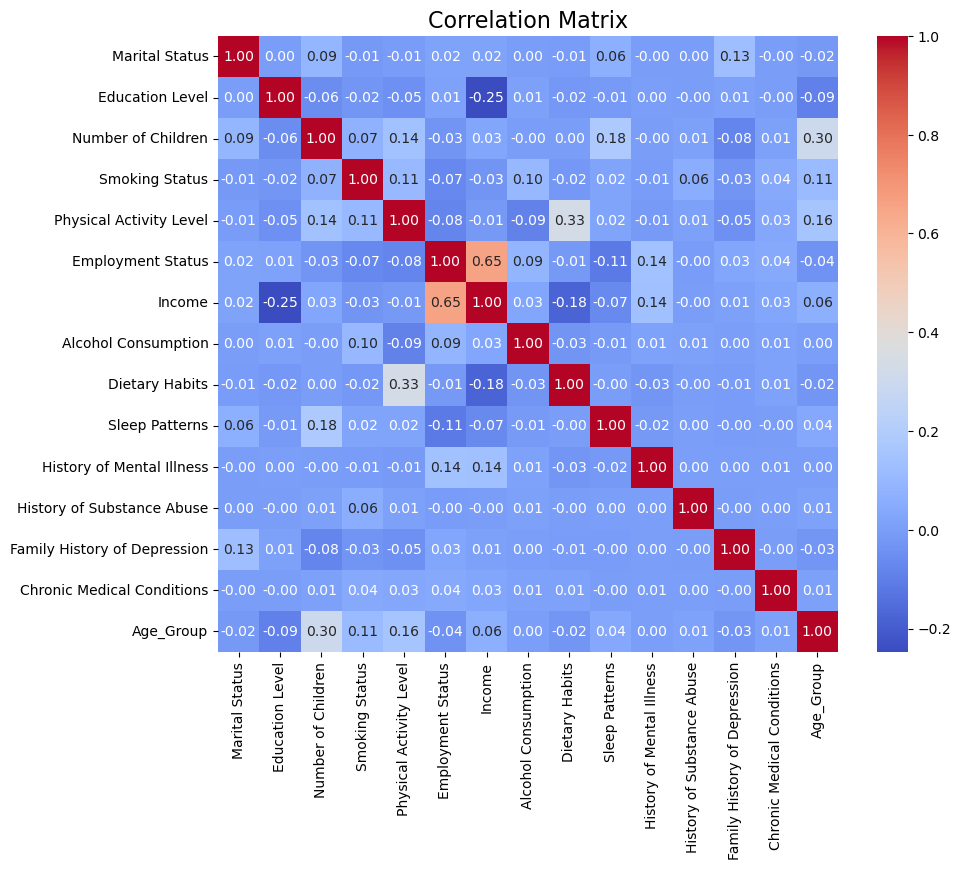

In [257]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [258]:
threshold = 0.01
correlation = df.corr()
high_corr_features = correlation.index[abs(correlation['History of Mental Illness']) > threshold].tolist()
high_corr_features.remove('History of Mental Illness') # Remove itself
print('Selected features based on corrolation with target:')
print(high_corr_features)
X_selected = df[high_corr_features]
y = df['History of Mental Illness']

Selected features based on corrolation with target:
['Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']


# Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_logistic):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     25165
           1       0.70      1.00      0.82     57589

    accuracy                           0.70     82754
   macro avg       0.35      0.50      0.41     82754
weighted avg       0.48      0.70      0.57     82754

AUC-ROC: 0.60


Analysis:

    Precision (Class 0): 0.00 indicates that none of the negative cases were predicted correctly as negative. This could be a result of the class imbalance or an inappropriate decision threshold.
    Recall (Class 1): 1.00 shows that the model correctly identifies all positive cases (mental illness history).
    F1-Score (Class 1): 0.82 indicates good performance for identifying positives, balancing precision and recall for the positive class.
    AUC-ROC (0.60): A value around 0.60 indicates weak classification power. It suggests that the model does not effectively distinguish between positive and negative cases.
    Accuracy: 0.70 is decent, but this is mainly due to the model correctly predicting the majority class (positive) while failing to predict the minority class (negative).
    Macro avg (0.35): Reflects the disparity between classes, as the recall and precision for class 0 are 0.
    Weighted avg (0.48): This is weighted heavily by class 1’s performance.

Insights:

    Class Imbalance: The model's performance for class 0 is poor, which is likely due to the imbalance between positive and negative cases.
    Precision-Recall Tradeoff: The model’s focus on class 1 results in perfect recall, but precision is low for class 0, suggesting it's over-predicting positives.

Recommendation:

    Use class weights in the logistic regression model or consider resampling techniques like SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance.
    Try adjusting the decision threshold to better balance the precision-recall tradeoff.

# KNN

In [302]:
# KNN Model
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Tuning k
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)

# Best KNN Model
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Evaluate KNN
print("\nK-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_knn):.2f}")


K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.36      0.13      0.19     25165
           1       0.70      0.90      0.79     57589

    accuracy                           0.67     82754
   macro avg       0.53      0.51      0.49     82754
weighted avg       0.60      0.67      0.61     82754

AUC-ROC: 0.55


# Improve Logistic Regression

In [307]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_selected)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=42)
model = LogisticRegression() 
X_train.shape

(372391, 5)

In [308]:
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.6962869671930847

In [309]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.6924619957947652


In [310]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

In [311]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print(accuracy)

0.6197887715397443


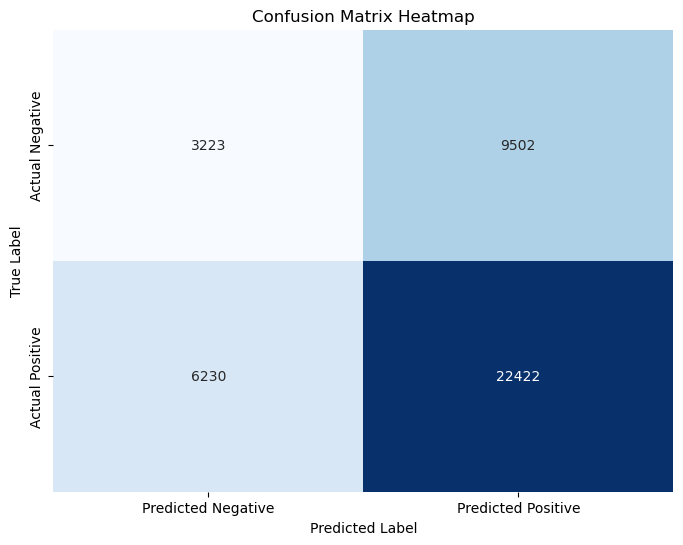

In [312]:
conf_matrix3 =confusion_matrix(Y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [313]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Logistic Regression Metrics
print("Logistic Regression Evaluation Metrics:")
print(f"Precision: {precision_score(Y_test, y_pred)}")
print(f"Recall: {recall_score(Y_test, y_pred)}")
print(f"F1-Score: {f1_score(Y_test, y_pred)}")

# KNN Metrics
print("KNN Evaluation Metrics:")
print(f"Precision: {precision_score(Y_test, y_pred_knn)}")
print(f"Recall: {recall_score(Y_test, y_pred_knn)}")
print(f"F1-Score: {f1_score(Y_test, y_pred_knn)}")


Logistic Regression Evaluation Metrics:
Precision: 0.6924619957947652
Recall: 1.0
F1-Score: 0.8182895657513316
KNN Evaluation Metrics:
Precision: 0.7023555945370255
Recall: 0.7825631718553678
F1-Score: 0.7402931854199684


In [ ]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12725
           1       0.69      1.00      0.82     28652

    accuracy                           0.69     41377
   macro avg       0.35      0.50      0.41     41377
weighted avg       0.48      0.69      0.57     41377



# XGBoost

Selected features based on correlation with target:
['Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns']
Model Evaluation Metrics:
Accuracy: 0.70
Precision: 0.70
Recall: 1.00
F1-Score: 0.82
AUC-ROC: 0.59

Cross-Validation AUC-ROC Scores: [0.59326254 0.59335188 0.59195163 0.59135612 0.58967484]
Mean AUC-ROC: 0.59


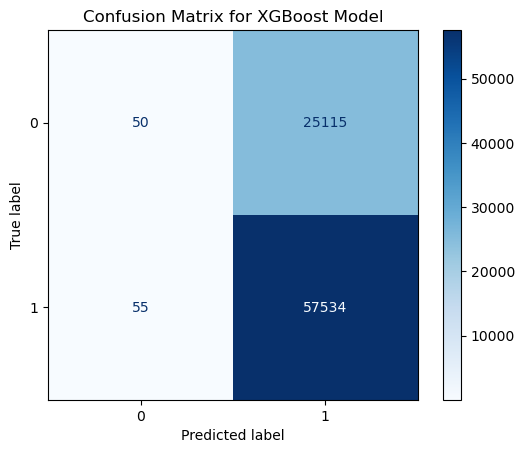

In [285]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is already defined and processed with 'History of Mental Illness' as the target variable
# Feature selection based on correlation
threshold = 0.01
correlation = df.corr()
high_corr_features = correlation.index[abs(correlation['History of Mental Illness']) > threshold].tolist()
high_corr_features.remove('History of Mental Illness')  # Remove itself
print('Selected features based on correlation with target:')
print(high_corr_features)

# Defining X and y
X_selected = df[high_corr_features]
y = df['History of Mental Illness']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Cross-validation for robustness
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='roc_auc')
print("\nCross-Validation AUC-ROC Scores:", cv_scores)
print(f"Mean AUC-ROC: {cv_scores.mean():.2f}")

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


In [272]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}


In [273]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with maximum F1-Score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")


Optimal Threshold: 0.38
